In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

In [2]:
import numpy as np

In [3]:
n0 = np.array([[5], [0], [5], [0]])

In [4]:
U = np.identity(4) * 0

In [5]:
U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
γ = 0.1
b = 2

In [16]:
U1 = np.identity(2) * 0

U1[0][0] = 1 - γ
U1[1][0] = γ
U1[0][1] = b

U2 = np.identity(2) * 0

U2[0][0] = 1 - γ
U2[1][0] = γ
U2[0][1] = b

In [27]:
α_rate = 0.01

In [40]:
ll_mat = np.zeros((2,2))
ur_mat = np.zeros((2,2))

ll_mat[0][0] = -α_rate

In [41]:
comb_mat = np.block([[U1, ur_mat],
                    [ll_mat, U2]])

In [42]:
comb_mat

array([[ 0.9 ,  2.  ,  0.  ,  0.  ],
       [ 0.1 ,  0.  ,  0.  ,  0.  ],
       [-0.01,  0.  ,  0.9 ,  2.  ],
       [ 0.  ,  0.  ,  0.1 ,  0.  ]])

In [43]:
n0 = np.array([[5], [0], [5], [0]])

n_list = []
for i in range(20):
    n0 = np.array(np.matmul(comb_mat, n0))
    n_list.append(n0)

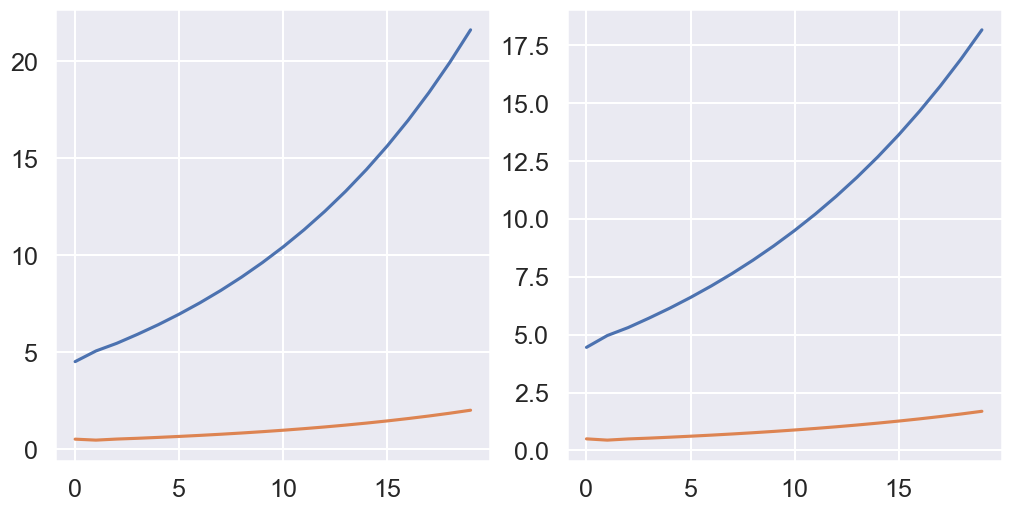

In [44]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()


axes[0].plot([m[0] for m in n_list])
axes[0].plot([m[1] for m in n_list])

axes[1].plot([m[2] for m in n_list])
axes[1].plot([m[3] for m in n_list])